*This notebook can be found on* [github](https://github.com/bastikr/QuantumOptics.jl/blob/master/examples/raman.ipynb)

Raman Transition of a $\Lambda$-scheme Atom
=====================

Consider a three-level atom with two ground states and one excited state ($\Lambda$-scheme), which decays only to one of the ground states. The atom is initially prepared in one of its ground states (the one it does not decay into). A Raman transition occurs when the transition from the initial ground state to the excited state is driven by a laser that is far detuned from the transition, but matches the energy difference between the two ground states. In this case, the atom is driven from the initial ground state to its other ground state without ever populating the excited state (even though no direct transition between the two ground states is possible).

This system is described by the Hamiltonian

$H = \Delta_2|2\rangle\langle2| + \Delta_3|3\rangle\langle3| + \Omega\left(\sigma_1 + \sigma_1^\dagger\right),$

where $|1\rangle$ is the initial ground state with energy 0, $|2\rangle$ is the excited state and $|3\rangle$ is the final ground state. The detunings $\Delta_{2,3}$ are with respect to the laser driving the transition $|1\rangle\to|2\rangle$. Matching the laser frequency to the energy difference between $|1\rangle$ and $|3\rangle$ means $\Delta_3=0$. The laser has the amplitude $\Omega$ and drives the transition with the operators $\sigma_1=|1\rangle\langle2|$.

The decay is given by the Lindblad super-operator

$\mathcal{L}[\rho] = \frac{\gamma_3}{2}\left(2\sigma_3\rho\sigma_3^\dagger - \sigma_3^\dagger\sigma_3\rho - \rho\sigma_3^\dagger\sigma_3\right),$

where $\gamma_3$ is the rate of decay and $\sigma_3=|3\rangle\langle2|$.

As always, the first step is to import the libraries we will use.

In [3]:
using QuantumOptics
using PyPlot

Next, we define the parameters we need.

In [5]:
# Parameters
γ₃ = 1.
Ω = .5γ₃
Δ₂ = 5γ₃
Δ₃ = 0.0
tmax = 800/γ₃
dt = 0.1
tlist = [0:dt:tmax;];

In this example, we make use of the N-level basis, which we initialize by passing the number of levels of our atom. We then define the respective transition operators.

In [7]:
# Basis and operators
b = NLevelBasis(3)
σ₁ = transition(b, 1, 2)
σ₃ = transition(b, 3, 2)
proj₂ = transition(b, 2, 2)
proj₃ = σ₃*dagger(σ₃);

This makes it easy to write down the Hamiltonian and the Jump operators.

In [8]:
# Hamiltonian and jump operators
H = Δ₂*proj₂ + Δ₃*proj₃ + Ω*(σ₁ + dagger(σ₁))
J = [sqrt(γ₃)*σ₃];

Next, we define the initial state (in our case $|1\rangle$) and pass it all to a master equation.

In [9]:
# Initial state
ψ₀ = nlevelstate(b, 1)

# Time evolution
tout, ρₜ = timeevolution.master(tlist, ψ₀, H, J);

Now, all that is left to do is to compute the expectation values of interest and plot the result.

In [10]:
# Expectation values
p1 = real(expect(σ₁*dagger(σ₁), ρₜ))
p2 = real(expect(proj₂, ρₜ))
p3 = real(expect(proj₃, ρₜ));

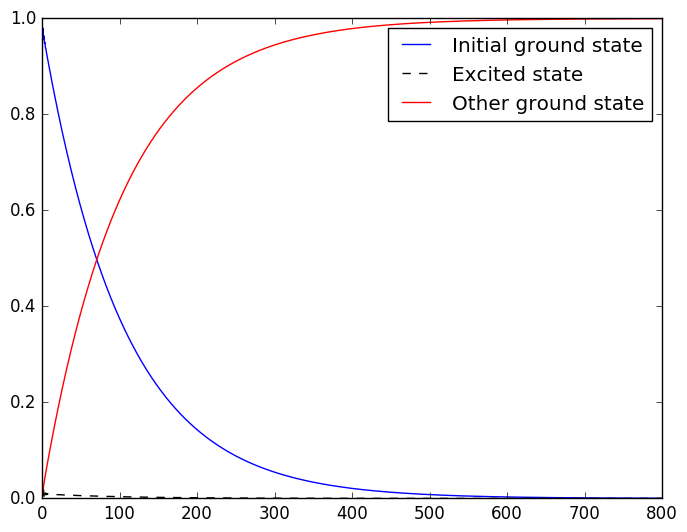

In [11]:
# Plots
clf()
plot(tout, p1, "b", label="Initial ground state")
plot(tout, p2, "k--", label="Excited state")
plot(tout, p3, "r", label="Other ground state")
axis([0, tmax, 0, 1])
legend()
show()